# Simulated Data across Methods

In [2]:
from mvlearn.embed import KCCA, DCCA
from mvlearn.datasets import GaussianMixture

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

## Raw Data

In [3]:
## Make Latents
n = 200
mu = [[0,1], [0,-1]]
sigma = 2*np.array([np.eye(2), np.eye(2)])
pi = [0.5,0.5]
GM_train = GaussianMixture(mu,sigma,n,class_probs=pi)

## Test
GM_test = GaussianMixture(mu,sigma,n,class_probs=pi)

In [4]:
## Make 2 views
n_noise = 2
transforms = ['linear', 'poly', 'sin']

Xs_train = []
Xs_test = []
for transform in transforms:
    GM_train.sample_views(transform=transform, n_noise=n_noise)
    GM_test.sample_views(transform=transform, n_noise=n_noise)

    Xs_train.append(GM_train.get_Xy()[0])
    Xs_test.append(GM_test.get_Xy()[0])

In [112]:
## Plotting parameters
labels = GM_test.latent[:,0]
#cmap = matplotlib.colors.ListedColormap(sns.color_palette("husl", len(labels)).as_hex())
cmap = matplotlib.colors.ListedColormap(sns.diverging_palette(240, 10, n=len(labels), center='light').as_hex())
cmap = 'coolwarm'

save_dir = '/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/figures/multiview/paper_figures/husl/'

context='poster'
show=False

scatter_kwargs = {'alpha':1.0}

In [111]:
for i,transform in enumerate(transforms):
    crossviews_plot(Xs_train[i], labels, dimensions=[0,1], ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{transform}_train.png')
        plt.close()
    crossviews_plot(Xs_test[i], labels, dimensions=[0,1], ax_ticks=False, ax_labels=False, equal_axes=True, context=context,cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{transform}_test.png')
        plt.close()

## Linear KCCA

In [103]:
ktype='linear'
kcca = KCCA(ktype=ktype, reg = 0.1, degree=2.0, constant=0.1, n_components = 2, test=True)
for i,transform in enumerate(transforms):
    components = kcca.fit(Xs_train[i]).transform(Xs_test[i])

    crossviews_plot(components, labels, ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{ktype}-kcca_{transform}-test.png')
        plt.close()

## Polynomial KCCA

In [104]:
ktype='poly'
kcca = KCCA(ktype=ktype, reg = 0.1, degree=2.0, constant=0.1, n_components = 2, test=True)
for i,transform in enumerate(transforms):
    components = kcca.fit(Xs_train[i]).transform(Xs_test[i])

    crossviews_plot(components, labels, ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{ktype}-kcca_{transform}-test.png')
        plt.close()

## Gaussian

In [105]:
ktype='gaussian'
kcca = KCCA(ktype=ktype, reg = 1.0, sigma=2.0, n_components = 2, test=True)
for i,transform in enumerate(transforms):
    components = kcca.fit(Xs_train[i]).transform(Xs_test[i])

    crossviews_plot(components, labels, ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'{ktype}-kcca_{transform}-test.png')
        plt.close()

## DCCA

In [108]:
for i,transform in enumerate(transforms):
    input_size1, input_size2 = Xs_train[i][0].shape[1], Xs_train[i][1].shape[1]
    outdim_size = min(Xs_train[i][0].shape[1], 2)
    layer_sizes1 = [256, 512, outdim_size]
    layer_sizes2 = [256, 512, outdim_size]
    dcca = DCCA(input_size1, input_size2, outdim_size, layer_sizes1, layer_sizes2, epoch_num=400)
    components = dcca.fit(Xs_train[i]).transform(Xs_test[i])

    crossviews_plot(components, labels, ax_ticks=False, ax_labels=False, equal_axes=True, context=context, cmap=cmap, show=show, scatter_kwargs=scatter_kwargs)
    if not show:
        plt.savefig(save_dir + f'dcca_{transform}-test.png')
        plt.close()

## One Figure

In [15]:
## Plotting parameters
labels = GM_test.latent[:,0]
cmap = matplotlib.colors.ListedColormap(sns.diverging_palette(240, 10, n=len(labels), center='light').as_hex())
cmap = 'coolwarm'

method_labels = ['Raw Views', 'Linear KCCA', 'Polynomial KCCA', 'Gaussian KCCA', 'DCCA']
transform_labels = ['Linear Transform', 'Polynomial Transform', 'Sinusoidal Transform']

input_size1, input_size2 = Xs_train[0][0].shape[1], Xs_train[0][1].shape[1]
outdim_size = min(Xs_train[0][0].shape[1], 1)
layer_sizes1 = [256, 512, outdim_size]
layer_sizes2 = [256, 512, outdim_size]
methods = [KCCA(ktype='linear', reg = 0.1, degree=2.0, constant=0.1, n_components = 1),
           KCCA(ktype='poly', reg = 0.1, degree=2.0, constant=0.1, n_components = 1),
           KCCA(ktype='gaussian', reg = 1.0, sigma=2.0, n_components = 1),
           DCCA(input_size1, input_size2, outdim_size, layer_sizes1, layer_sizes2, epoch_num=400)
]

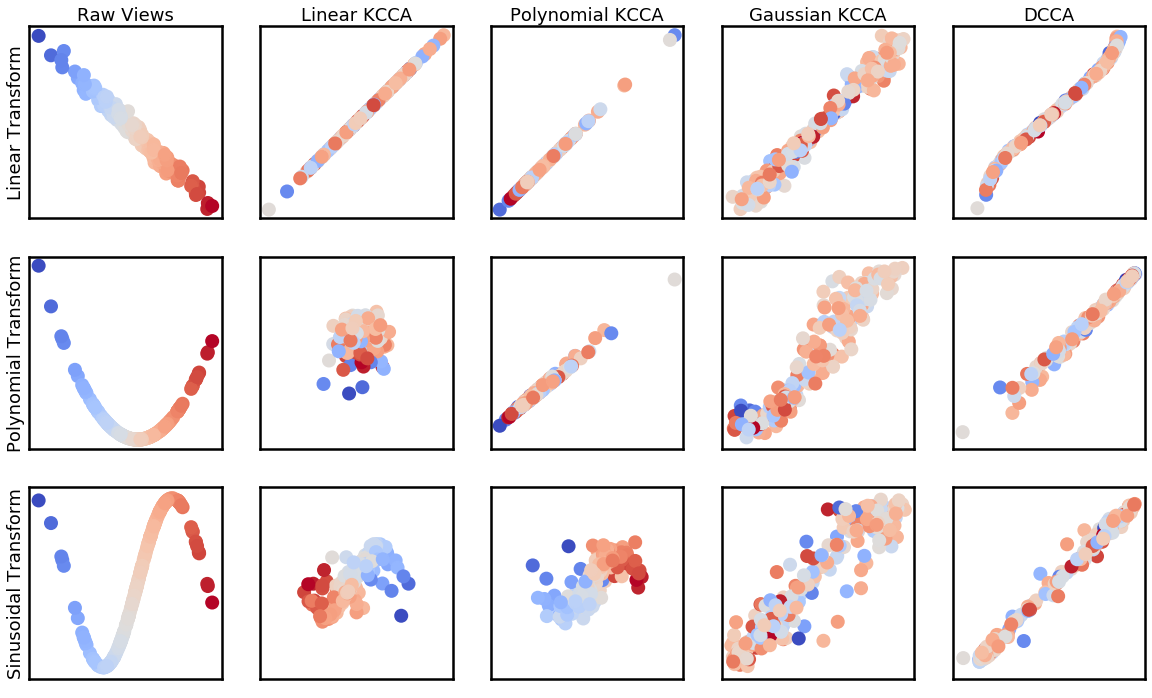

In [29]:
fig, axes = plt.subplots(3, 5, figsize=(20,12))
sns.set_context('poster')

for r,transform in enumerate(transforms):
    ax = axes[r,0]
    ax.scatter(
        Xs_test[r][0][:, 0],
        Xs_test[r][1][:, 0],
        cmap=cmap,
        c=labels,
    )
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_ylabel(transform_labels[r], {'fontsize':18})
    if r == 0:
        ax.set_title(method_labels[0], {'fontsize':18})
    
    for c,method in enumerate(methods):
        ax = axes[r,c+1]
        Xs = method.fit(Xs_train[r]).transform(Xs_test[r])
        ax.scatter(
            Xs[0][:,0],
            Xs[1][:,0],
            cmap=cmap,
            c=labels,
        )
        if r == 0:
            ax.set_title(method_labels[c+1], {'fontsize':18})
        ax.axis("equal")
        ax.set_xticks([], [])
        ax.set_yticks([], [])

plt.savefig('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/figures/paper_figures/all_plots.pdf')
plt.show()